# Dynex SDK - Medium Native Gate Circuit Example

First we import the required packages:

In [1]:
import dynex
from dynex import dynex_circuit
from pennylane import numpy as np
import pennylane as qml

We define our circuit:

In [2]:
params = [0.3, 0.1]
wires = 3

def Medium(params):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RX(params[0], wires=1)
    qml.CRZ(params[1], wires=[0, 1])
    qml.T(wires=1)
    qml.Toffoli(wires=[0, 1, 2]) 
    qml.SWAP(wires=[1, 2])
    return qml.state()

We draw the circuit:

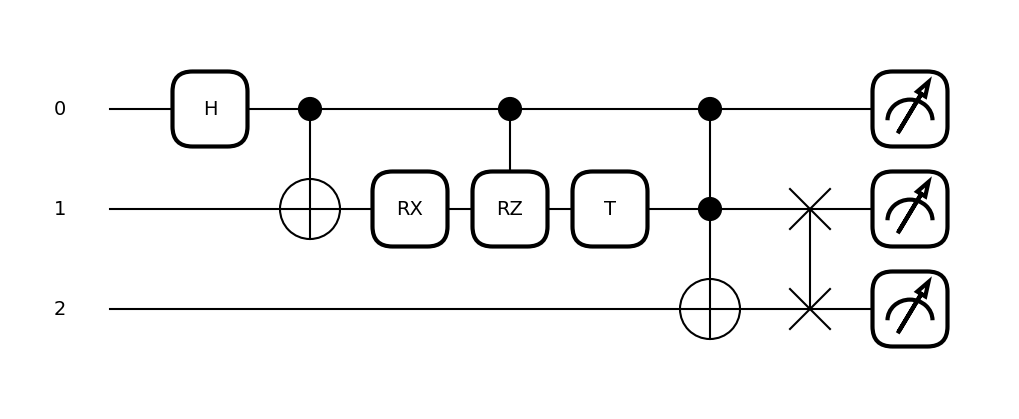

In [4]:
# draw circuit:
_ = qml.draw_mpl(Medium, style="black_white")(params)

We execute and measure the circuit on the Dynex platform:

In [5]:
# Execute the circuit on Dynex:
measure = dynex_circuit.execute(Medium, params, wires, mainnet=True, method='probs', shots=3)
print('Mesaure:',measure)

╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │   ELAPSED │   WORKERS READ │   CIRCUITS │   STEPS │   GROUND STATE │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼────────────────┼────────────┼─────────┼────────────────┤
│      29837 │       35 │             140 │        0.00 │      3.12 │              3 │   16635712 │     256 │      134839.00 │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴────────────────┴────────────┴─────────┴────────────────╯
╭─────────────────────────────┬───────────┬────────────┬───────┬──────────┬───────────┬───────────────┬─────────┬──────────╮
│                      WORKER │   VERSION │   CIRCUITS │   LOC │   ENERGY │   RUNTIME │   LAST UPDATE │   STEPS │   STATUS │
├─────────────────────────────┼───────────┼────────────┼───────┼──────────┼───────────┼───────────────┼─────────┼──